In [1]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
# initialising the CNN
classifier = Sequential()

# step 1 - convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
# step 2 - pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
# step 3 - flattening
classifier.add(Flatten())
# step 4 - full connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# data augmentation
## creating more data from existing dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/training_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('data/test_set',
                                           target_size=(64, 64),
                                           batch_size=32,
                                           class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
# training
history = classifier.fit_generator(training_set,
                                  steps_per_epoch=50,
                                  epochs=10,
                                  validation_data=test_set)

/opt/conda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-07-15 01:40:40.196865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-15 01:40:40.198058: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4199995000 Hz


Epoch 1/10
50/50 [==============================] - 36s 712ms/step - loss: 0.7306 - accuracy: 0.4899 - val_loss: 0.6828 - val_accuracy: 0.5485
Epoch 2/10
50/50 [==============================] - 23s 461ms/step - loss: 0.6810 - accuracy: 0.5577 - val_loss: 0.6628 - val_accuracy: 0.5610
Epoch 3/10
50/50 [==============================] - 22s 435ms/step - loss: 0.6557 - accuracy: 0.6036 - val_loss: 0.6327 - val_accuracy: 0.6765
Epoch 4/10
50/50 [==============================] - 21s 416ms/step - loss: 0.6581 - accuracy: 0.6021 - val_loss: 0.6264 - val_accuracy: 0.6535
Epoch 5/10
50/50 [==============================] - 20s 397ms/step - loss: 0.6306 - accuracy: 0.6599 - val_loss: 0.6092 - val_accuracy: 0.6800
Epoch 6/10
50/50 [==============================] - 20s 394ms/step - loss: 0.6413 - accuracy: 0.6290 - val_loss: 0.6072 - val_accuracy: 0.6825
Epoch 7/10
50/50 [==============================] - 19s 384ms/step - loss: 0.6071 - accuracy: 0.6655 - val_loss: 0.6425 - val_accuracy: 0.6315

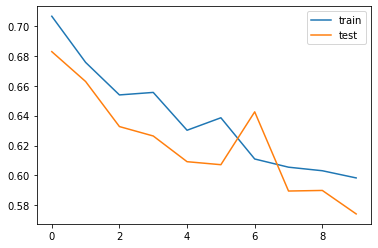

In [6]:
# check with graph on loss during training
import matplotlib.pyplot as plt

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [8]:
# testing
import numpy as np
from tensorflow.keras.preprocessing import image

# loading an image from the disk
test_image = image.load_img('random_dog.png', target_size=(64, 64))

# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
# print(training_set.class_indices) <-- refer to the cell below for output

# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

dog


In [7]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}
